# Machine Learning Analysis

- Gabriel Wendell Celestino Rocha
- Leonardo Andrade de Almeida

---

## 0. Setup

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
from matplotlib.font_manager import FontProperties

# CML Models
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import seaborn as sns
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# NN Models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

- ### Aesthetic Functions

In [2]:
%matplotlib inline

cm_font = FontProperties(fname  = 'CutiveMono-Regular.ttf')
gs_font = FontProperties(fname  = 'GillSans-Light.otf')
cm_size = 20


###############
# SINGLE PLOT #
###############
def sm_plot(grid = True, dark_background = False, use_tex = False, font_family = 'monospace', font_size = 15, 
            minorticks = True, major_ticks = True, minor_ticks = True, grid_linestyle = ':', grid_color = '0.50', 
            tick_length_minor = 5, tick_width_minor = 1, tick_length_major = 8, tick_width_major = 1, labelsize = 15):
    """
    Function to improve the aesthetics of Matplotlib graphs.
    """
    if dark_background:
        plt.style.use('dark_background')
    
    if grid:
        plt.grid(True, linestyle = grid_linestyle, color = grid_color, zorder = 0)
    else:
        plt.grid(False)
    
    plt.rcParams['text.usetex'] = use_tex
    plt.rcParams['font.family'] = font_family
    plt.rcParams['font.size'] = font_size
    
    if minorticks:
        plt.minorticks_on()
    else:
        plt.minorticks_off()
    
    if minor_ticks:
        plt.tick_params(axis = 'both', which = 'minor', direction = "in", 
                        top = True, right = True, length = tick_length_minor, 
                        width = tick_width_minor, labelsize = labelsize)
    
    if major_ticks:
        plt.tick_params(axis = 'both', which = 'major', direction = "in", 
                        top = True, right = True, length = tick_length_major, 
                        width = tick_width_major, labelsize = labelsize)
        
        
# ----------------------------------------------------------------------------------------------------------


###############
## PLOT AXES ##
###############
def sm_plot_mod(ax, grid = True, dark_background = False, use_tex = False, font = 'monospace', font_size = 15, 
                minor_ticks = True, minor_tick_params = True, major_tick_params = True):
    
    if dark_background:
        plt.style.use('dark_background')
    else:
        plt.style.use('default')

    ax.grid(grid, linestyle = ':', color = '0.50')
    
    plt.rcParams['font.family'] = font
    plt.rcParams['font.size'] = font_size
    
    plt.rcParams['text.usetex'] = use_tex
    
    if minor_ticks:
        ax.minorticks_on()
    else:
        ax.minorticks_off()

    if minor_tick_params:
        ax.tick_params(axis = 'both', which = 'minor', direction = "in", 
                       top = True, right = True, length = 5, width = 1, labelsize = font_size)

    if major_tick_params:
        ax.tick_params(axis = 'both', which = 'major', direction = "in", 
                       top = True, right = True, length = 8, width = 1, labelsize = font_size)

---

## 1. Loading data

The master dataframe consists of the union of the two datasets presented above. It is also important to reorganize the data so that it is indexed based on the galaxy analyzed (NGC number). The base-$10\log$ of the period for each Cepheid is also calculated.

In [3]:
data_path = '../data/'
df_path = data_path + 'R11treat.dat'

df = pd.read_csv(df_path, sep = '	', skiprows = 8)
print('DATAFRAME MASTER =D')
display(df)

print('---------------------')
print('  SHAPE =', df.shape)
print('---------------------')

info_path = data_path + 'R11treat_info.txt'

with open(info_path, 'r') as file:
    info = file.read()

print(info)

DATAFRAME MASTER =D


,id,gal,z,dL,M,Merr,m,merr,P,logP,logO_H,bias,Pivot
0,27185,4536,0.006031,25.847143,-7.549763,0.31,24.5123,0.31,13.000,1.113943,-3.46,0.13,1.474125
1,42353,4536,0.006031,25.847143,-6.071363,0.74,25.9907,0.74,13.070,1.116276,-3.03,0.37,1.474125
2,50718,4536,0.006031,25.847143,-7.912863,0.42,24.1492,0.42,13.730,1.137671,-3.36,0.28,1.474125
3,72331,4536,0.006031,25.847143,-7.586963,0.44,24.4751,0.44,13.910,1.143327,-3.19,0.22,1.474125
4,65694,4536,0.006031,25.847143,-7.203863,0.38,24.8582,0.38,14.380,1.157759,-3.10,0.39,1.474125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,29163,4258,0.001494,6.402857,-4.879869,0.57,24.1520,0.57,6.739,0.828595,-3.25,0.38,1.474125
642,34729,4258,0.001494,6.402857,-6.371069,0.50,22.6608,0.50,14.920,1.173769,-3.25,0.00,1.474125
643,89375,4258,0.001494,6.402857,-6.619069,0.45,22.4128,0.45,12.380,1.092721,-3.11,0.42,1.474125
644,246695,4258,0.001494,6.402857,-6.434969,0.40,22.5969,0.40,11.200,1.049218,-3.11,0.49,1.474125


---------------------
  SHAPE = (646, 13)
---------------------

# R11treat.dat
#
# This is a processed and treated version of the Cepheid and redshift datas from R11.
# (Riess et al. 2011 [R11], ApJ, 730, 119, Table 2)
#
# Columns:
#      id: the ID of the cepheid
#     gal: the NGC number of the host galaxy
#       z: redshift of the host galaxy
#      dL: the distance computed via Hubble's law
#       M: abs mags M are computed using M = m + 5*log10(dL/Mpc) + 25
#    Merr: abs mags errs are just the mags m errs
#       m: mags m are computed using m = F160W - 0.41*(V_I)
#    merr: mag errs are just those in the F160W mags
#          (errors in V-I were not given in R11)
#       P: period P is in days (errors in the Period were not given)
#    logP: base-10log of the period for each Cepheid
#  logO_H: this is actually log[O/H], not 12 + log[O/H] as in R11
#    bias: this is the crowding bias *already applied* by R11
#
# Notes:
# - cepheid with id 102255 was excluded since its mag err

---

## 2. Ridge & Lasso Regression

In [4]:
# Extract features and target variable
X = df[['logP', 'logO_H']]   # Features
y = df['M']                  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
# Ridge Regression
ridge_model = Ridge(alpha = 1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha = 0.1)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [6]:
# Evaluate Ridge Model
print("RIDGE REGRESSION")
print(f"- Coefficients = {ridge_model.coef_}")
print(f"- Intercept = {ridge_model.intercept_}")
print(f"- Mean Absolute Error = {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"- Mean Squared Error = {mean_squared_error(y_test, y_pred_ridge)}")
print(f"- Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"- R2 Score = {r2_score(y_test, y_pred_ridge)}")

# Evaluate Lasso Model
print("\nLASSO REGRESSION")
print(f"- Coefficients = {lasso_model.coef_}")
print(f"- Intercept = {lasso_model.intercept_}")
print(f"- Mean Absolute Error = {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"- Mean Squared Error = {mean_squared_error(y_test, y_pred_lasso)}")
print(f"- Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"- R2 Score = {r2_score(y_test, y_pred_lasso)}")

RIDGE REGRESSION
- Coefficients = [-2.96652633 -0.08325648]
- Intercept = -3.1542788285542436
- Mean Absolute Error = 0.6539514149635561
- Mean Squared Error = 0.7121209187195398
- Root Mean Squared Error = 0.8438725725603006
- R2 Score = 0.5316350406135235

LASSO REGRESSION
- Coefficients = [-1.73207542 -0.        ]
- Intercept = -4.715953981409658
- Mean Absolute Error = 0.7544516238232355
- Mean Squared Error = 0.8826644631136809
- Root Mean Squared Error = 0.9395022422079049
- R2 Score = 0.41946782554643447


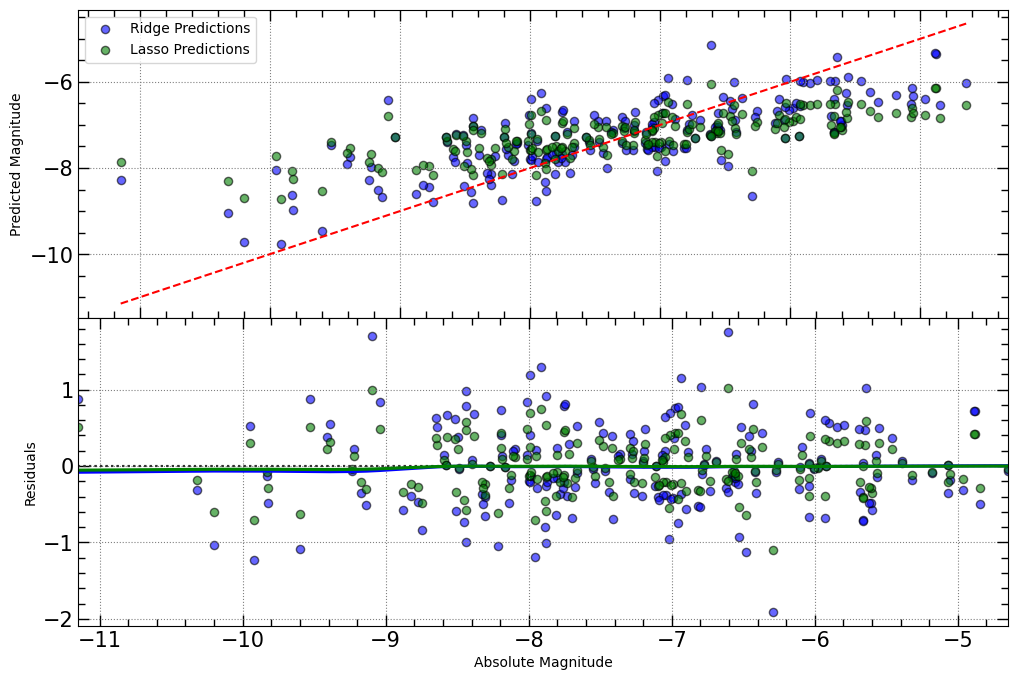

In [7]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_ridge, color = 'b', edgecolors = 'k', s = 35, alpha = 0.6, label = 'Ridge Predictions')
ax0.scatter(y_test, y_pred_lasso, color = 'g', edgecolors = 'k', s = 35, alpha = 0.6, label = 'Lasso Predictions')
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_ridge, lowess = True, color = 'b', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))
ax1 = sns.residplot(x = y_test, y = y_pred_lasso, lowess = True, color = 'g', 
                   scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

ax0.legend(loc = 'best')
sm_plot_mod(ax0)
sm_plot_mod(ax1)

---

## 3. Decision Tree & Random Forest

In [8]:
# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(random_state = 42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)

In [9]:
# Evaluate Decision Tree Model
print("DECISION TREE REGRESSION")
print(f"- Mean Absolute Error = {mean_absolute_error(y_test, y_pred_tree)}")
print(f"- Mean Squared Error = {mean_squared_error(y_test, y_pred_tree)}")
print(f"- Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_tree))}")
print(f"- R2 Score = {r2_score(y_test, y_pred_tree)}")

# Evaluate Random Forest Model
print("\nRANDOM FOREST REGRESSION")
print(f"- Mean Absolute Error = {mean_absolute_error(y_test, y_pred_forest)}")
print(f"- Mean Squared Error = {mean_squared_error(y_test, y_pred_forest)}")
print(f"- Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_forest))}")
print(f"- R2 Score = {r2_score(y_test, y_pred_forest)}")

DECISION TREE REGRESSION
- Mean Absolute Error = 0.9052202813975975
- Mean Squared Error = 1.3324353403098677
- Root Mean Squared Error = 1.154311630500996
- R2 Score = 0.12365160516353546

RANDOM FOREST REGRESSION
- Mean Absolute Error = 0.7729168377113128
- Mean Squared Error = 0.9593204691147815
- Root Mean Squared Error = 0.9794490640736666
- R2 Score = 0.3690508441130117


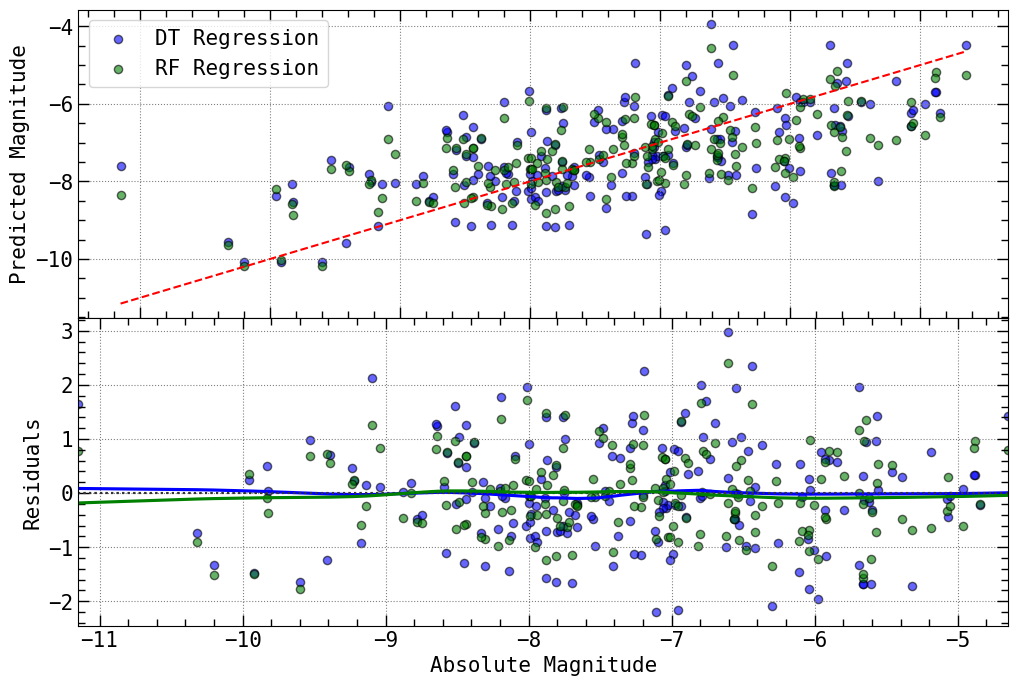

In [10]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_tree, color = 'b', edgecolors = 'k', s = 35, alpha = 0.6, label = 'DT Regression')
ax0.scatter(y_test, y_pred_forest, color = 'g', edgecolors = 'k', s = 35, alpha = 0.6, label = 'RF Regression')
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_tree, lowess = True, color = 'b', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))
ax1 = sns.residplot(x = y_test, y = y_pred_forest, lowess = True, color = 'g', 
                   scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

ax0.legend(loc = 'best')
sm_plot_mod(ax0)
sm_plot_mod(ax1)

---

## 4. Support Vector Regression (SVR)

In [20]:
# Standardize the data (SVR performs better with scaled data)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# SVR Model
svr_model = SVR(kernel = 'rbf', C = 1.0, epsilon = 0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate SVR Model
print("Support Vector Regression (SVR):")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Support Vector Regression (SVR):
Mean Squared Error: 0.7609925604886878
R2 Score: 0.49949195379967826


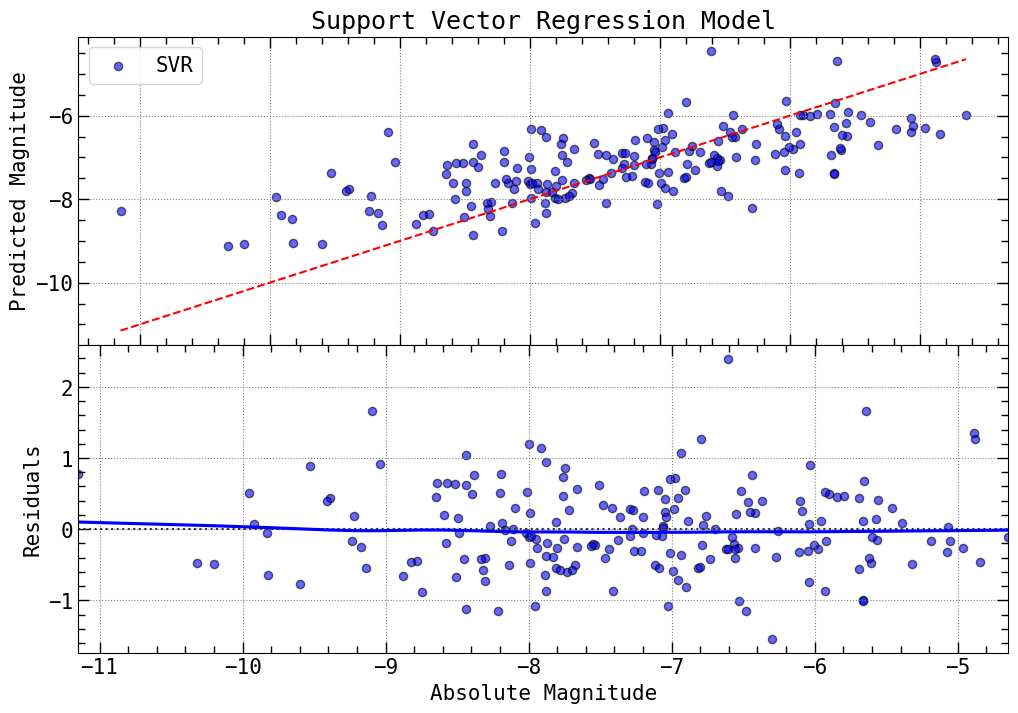

In [25]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_svr, color = 'b', edgecolors = 'k', s = 35, alpha = 0.6, label = 'SVR')
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_svr, lowess = True, color = 'b', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_title('Support Vector Regression Model')
ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

ax0.legend(loc = 'best')
sm_plot_mod(ax0)
sm_plot_mod(ax1)

---

## 5. Gradient Boosting Machines (GBM) / XBoost

In [30]:
# GBM Model
gbm_model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gbm_model.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate GBM Model
print("Gradient Boosting Machines (GBM):\n")
print(f"1) Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"2) R2 Score: {r2_score(y_test, y_pred)}")

Gradient Boosting Machines (GBM):

1) Mean Squared Error: 0.8108722973481254
2) R2 Score: 0.46668583855399004


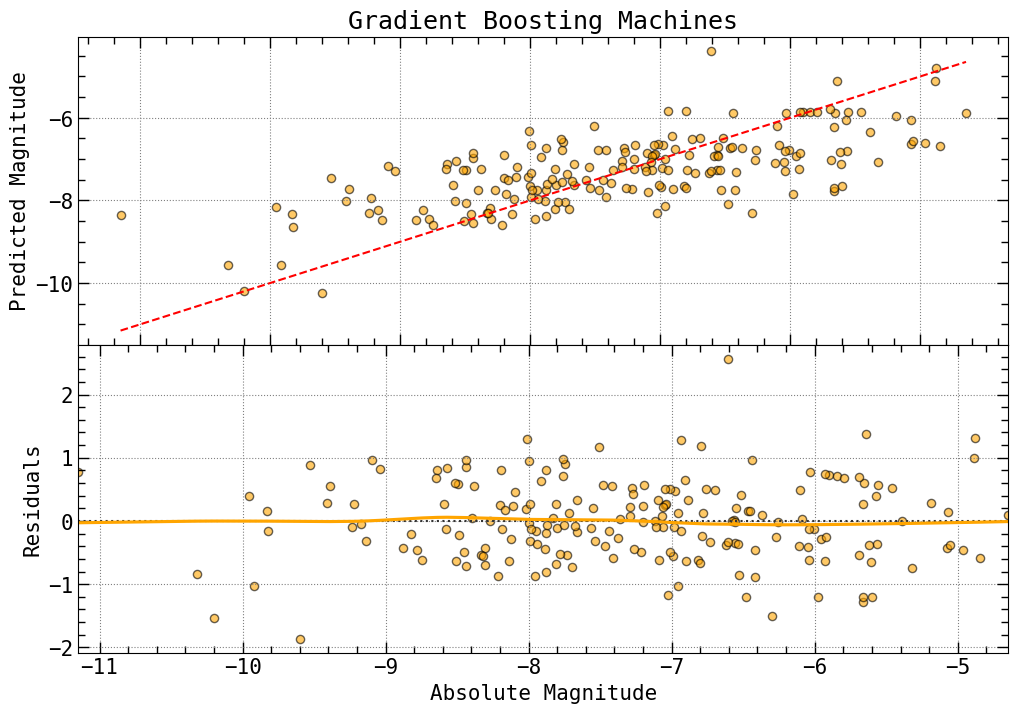

In [34]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_gbm, color = 'orange', edgecolors = 'k', s = 35, alpha = 0.6)
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_gbm, lowess = True, color = 'orange', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_title('Gradient Boosting Machines')
ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

sm_plot_mod(ax0)
sm_plot_mod(ax1)

---

## 6. Neural Networks

### 6.1 Feedforward Neural Network (FNN)

In [37]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Feedforward Neural Network (FNN) model
model = Sequential()
model.add(Dense(64, input_dim = 2, activation = 'relu'))  # First hidden layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(64, activation = 'relu'))  # Second hidden layer
model.add(Dense(1, activation = 'linear'))  # Output layer
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Compiling the model
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mse')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

# Training the model
history = model.fit(X_train_scaled, y_train, 
                    validation_data = (X_test_scaled, y_test),
                    epochs = 100, 
                    batch_size = 16, 
                    callbacks = [early_stopping],
                    verbose = 1)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 52.1515 - val_loss: 38.1084
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.3901 - val_loss: 16.7300
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.4535 - val_loss: 7.6588
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9103 - val_loss: 6.0504
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9446 - val_loss: 4.9178
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9808 - val_loss: 3.9815
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4350 - val_loss: 3.2123
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1224 - val_loss: 2.6176
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7432 - val_loss: 2.1150
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1105 - val_loss: 1.7981
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7443 - val_loss: 1.5199
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

In [40]:
# Evaluating the model
mse = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error on the test set: {mse}")

# Making predictions
y_pred_fnn = model.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7373 
Mean Squared Error on the test set: 0.7006992697715759
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


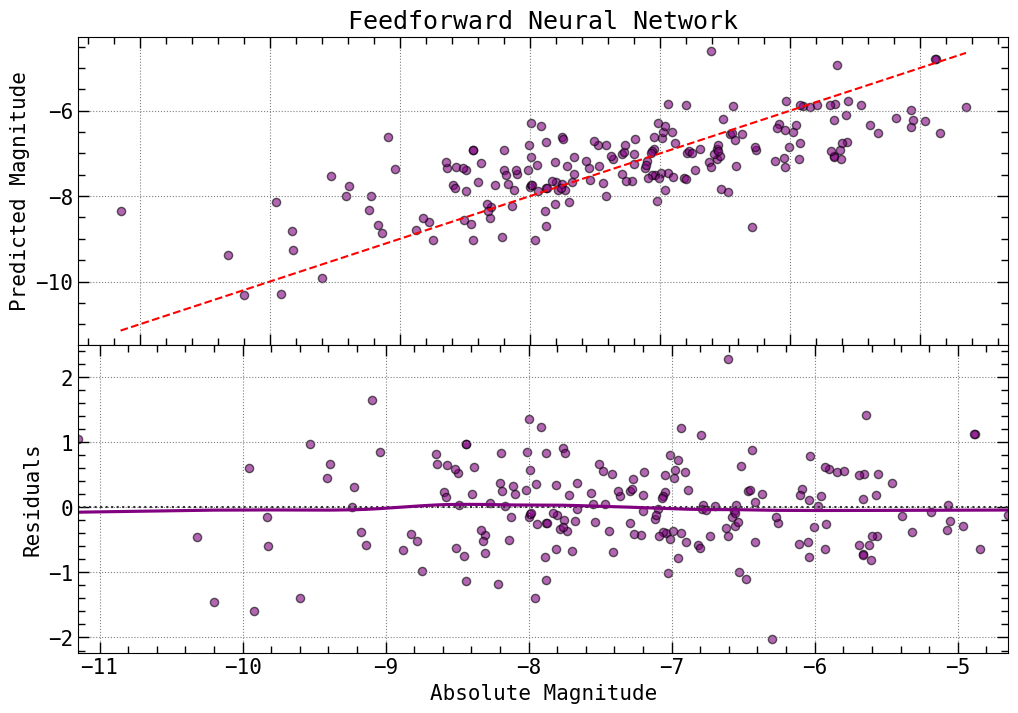

In [42]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_fnn, color = 'purple', edgecolors = 'k', s = 35, alpha = 0.6)
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_fnn, lowess = True, color = 'purple', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_title('Feedforward Neural Network')
ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

sm_plot_mod(ax0)
sm_plot_mod(ax1)

### 6.2 Tunning

In [46]:
# Feature Engineering: Add polynomial features and scale
poly = PolynomialFeatures(degree = 2, interaction_only = True)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size = 0.2, random_state = 42)

In [48]:
# Custom Keras Regressor Wrapper
class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn, epochs = 100, batch_size = 32, verbose = 0, **kwargs):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.kwargs = kwargs
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn(**self.kwargs)
        self.model.fit(X, y, epochs = self.epochs, batch_size=self.batch_size, verbose = self.verbose, 
                       callbacks = [EarlyStopping(monitor = 'loss', patience = 10)])
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        return -np.mean((self.predict(X) - y) ** 2)  # Negative MSE for consistency with scikit-learn

In [49]:
# Define the model
def build_model(learning_rate = 0.001, dropout_rate = 0.0, neurons = 50, activation = 'relu'):
    model = Sequential()
    model.add(Dense(neurons, input_dim = X_train.shape[1], activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=Adam(learning_rate = learning_rate), loss = 'mse')
    return model

# Wrap the model for use in scikit-learn
model = KerasRegressor(build_fn = build_model, verbose = 0)

In [50]:
# Define hyperparameters for tuning
param_grid = {
    'build_fn': [build_model],
    'learning_rate': [0.001, 0.01, 0.1],
    'neurons': [20, 50, 100],
    'dropout_rate': [0.0, 0.2, 0.4],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 200],
    'activation': ['relu', 'tanh', 'sigmoid']
}

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 20, 
                                   cv = 3, verbose = 2, n_jobs = -1)
random_search_result = random_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best hyperparameters: {random_search_result.best_params_}")

# Evaluate on test data
best_model = random_search_result.best_estimator_
test_loss = best_model.score(X_test, y_test)
print(f"Test loss (MSE): {test_loss}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits


ValueError: Invalid parameter 'neurons' for estimator KerasRegressor(build_fn=<function build_model at 0x0000019C5347B820>). Valid parameters are: ['batch_size', 'build_fn', 'epochs', 'verbose'].

In [ ]:
# Predictions
y_pred_opt = best_model.predict(X_test)

# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_opt, color = 'purple', edgecolors = 'k', s = 35, alpha = 0.6)
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_opt, lowess = True, color = 'purple', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_title('Feedforward Neural Network (Tunning)')
ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

sm_plot_mod(ax0)
sm_plot_mod(ax1)